imports

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping

loading the dataset

In [10]:
df = pd.read_csv('train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [11]:
#missing values
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [12]:
df = df.drop(['datetime'], axis=1)
X = df.drop('count', axis=1)
y = df['count']

scaling the data

In [13]:
scaler = RobustScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))


spliting the data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


im building the regression model

In [15]:
reg_model = Sequential([
    Input(shape=(X_train.shape[1],)), # Use X_train.shape[1] for input shape
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)), # Reduced regularization strength
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)), # Reduced regularization strength
    BatchNormalization(),
    Dropout(0.3),
    Dense(1)
])

compiling

In [16]:
reg_model.compile(optimizer='adam', loss='mean_squared_error')

training the model with early stopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Increased patience
reg_history = reg_model.fit(X_train, y_train, epochs=50, batch_size=32, # Increased epochs
                            validation_split=0.2, callbacks=[early_stop], verbose=0) # Added verbose=0


evaluation

In [18]:
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on test data: {mse}")
print(f"Mean Absolute Error on test data: {mae}")
print(f"Root Mean Squared Error on test data: {np.sqrt(mse)}")
print(f"R-squared on test data: {r2}")



69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error on test data: 0.002100108873449468
Mean Absolute Error on test data: 0.02996604002961914
Root Mean Squared Error on test data: 0.045826944840884475
R-squared on test data: 0.9962737899522817


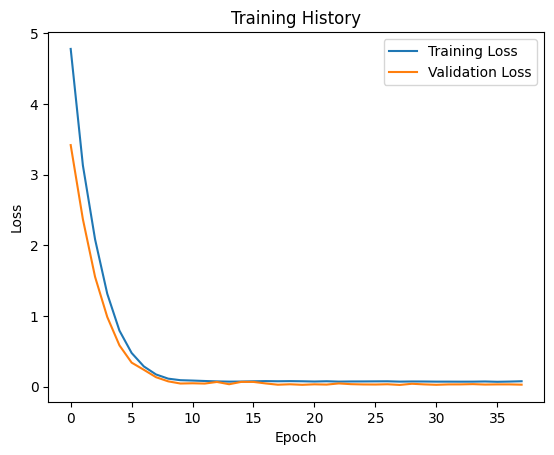

In [19]:
# Plot training history
plt.plot(reg_history.history['loss'], label='Training Loss')
plt.plot(reg_history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()